In [ ]:
## importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [ ]:
##loading the MNIST dataset
mnist=tf.keras.datasets.mnist

In [ ]:
#splitting the data into training and testing datasets
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
## let us check the shapes of the training and testing datasets
x_train_full.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
## As we know that the digits are stored in form of the pixels.
## each digit has 28 pixels
## All pixels ranges from 0 to 255 grey levels

In [ ]:
# Creating a validation data set from the training data set
x_valid,x_train=x_train_full[:5000],x_train_full[5000:]

In [ ]:
# Now we will scale the data between 0 to 1 by dividing it by 255
x_valid=x_valid/255

In [ ]:
x_train=x_train/255

In [ ]:
x_test=x_test/255

In [ ]:
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

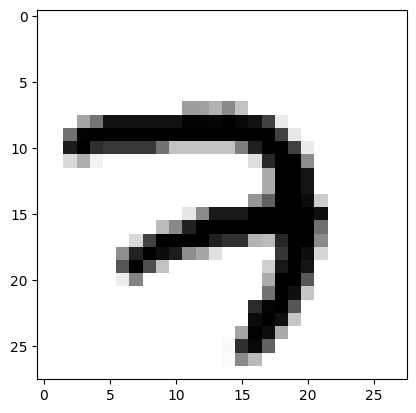

In [ ]:
# Now let us visualize how the MNIST data looks like
plt.imshow(x_train[0],cmap="binary")
plt.show()

<Axes: >

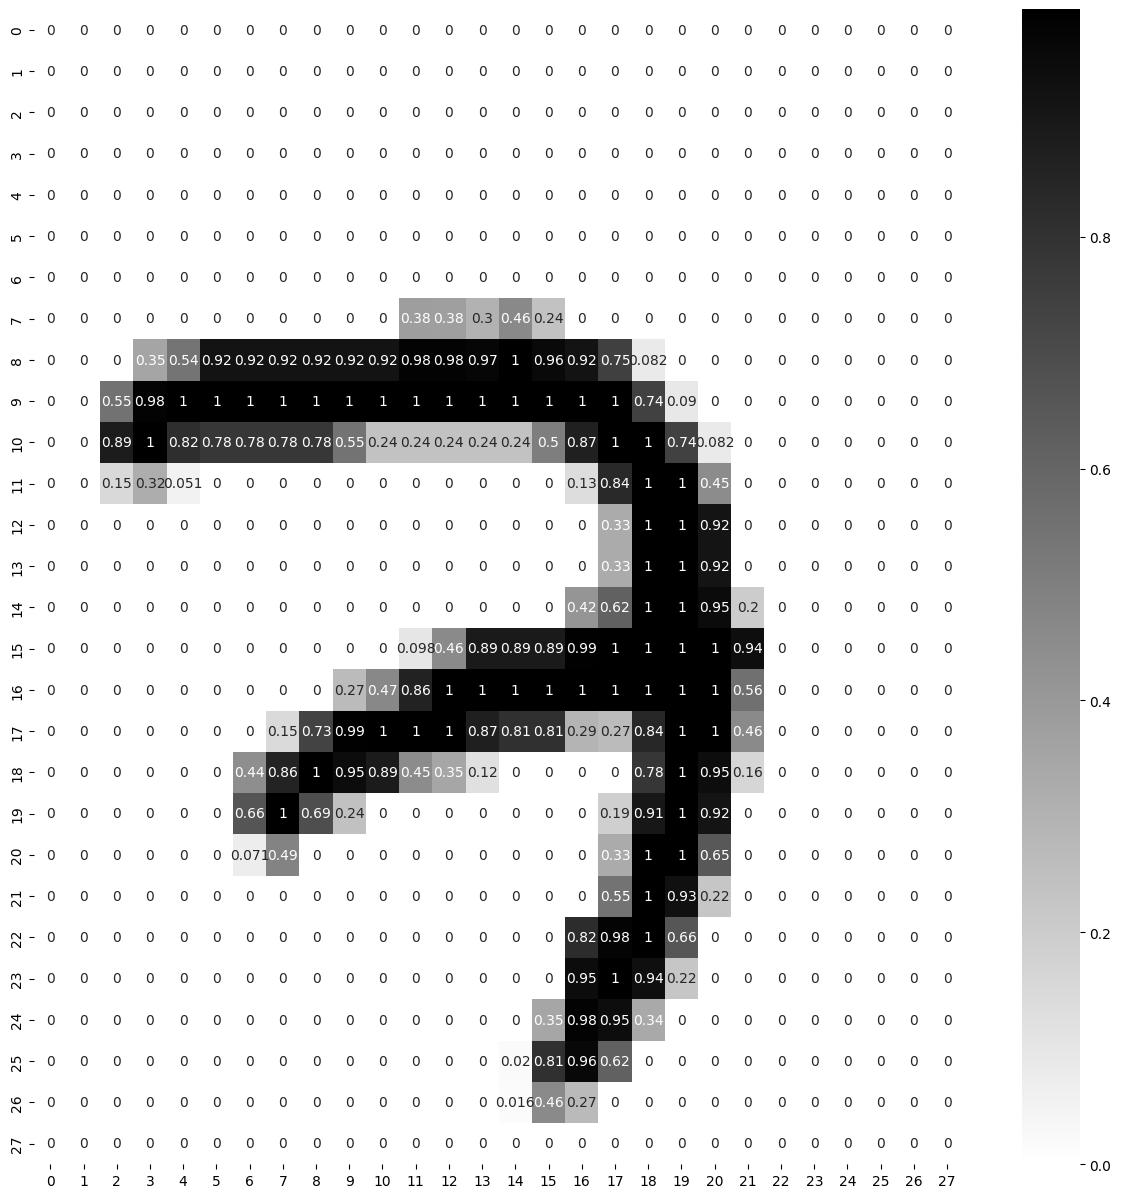

In [ ]:
# To visualize it in at grey levels
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],annot=True,cmap="binary")

In [ ]:
# Now we will create a Artificial neural network with some hidden layers to build a model that predicts the written digit
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="outputlayer")]



In [ ]:
# Now we will buila a Sequential model
model_clf=tf.keras.models.Sequential(Layers)

In [ ]:
model_clf.layers

In [ ]:
# Let us see the summary of the model
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights,biases=model_clf.layers[1].get_weights()

In [ ]:
# Defining the parameters to train the model
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]

In [ ]:
model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [ ]:
EPOCHS=30
VALIDATION_SET=(x_valid,y_valid)

In [ ]:
history=model_clf.fit(x_train,y_train,epochs=EPOCHS,
                      validation_data=VALIDATION_SET,
                      batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6124 - accuracy: 0.8413 - val_loss: 0.3047 - val_accuracy: 0.9166
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2887 - accuracy: 0.9181 - val_loss: 0.2397 - val_accuracy: 0.9332
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2362 - accuracy: 0.9330 - val_loss: 0.2069 - val_accuracy: 0.9430
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2022 - accuracy: 0.9423 - val_loss: 0.1797 - val_accuracy: 0.9504
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1763 - accuracy: 0.9499 - val_loss: 0.1610 - val_accuracy: 0.9552
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1560 - accuracy: 0.9553 - val_loss: 0.1462 - val_accuracy: 0.9598
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1397 - accuracy: 0.9599 - val_loss: 0.1339 - val_accuracy

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

<Axes: >

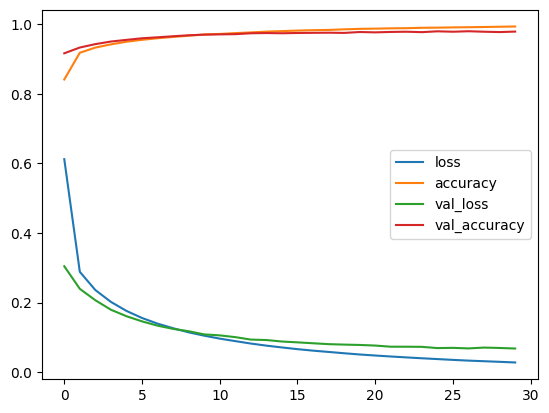

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0688 - accuracy: 0.9778


[0.06879457086324692, 0.9778000116348267]

In [ ]:
x_new=x_test[:3]
actual=y_test[:3]
y_prob=model_clf.predict(x_new)
y_pred=np.argmax(y_prob,axis=-1)

1/1 [==============================] - 0s 392ms/step


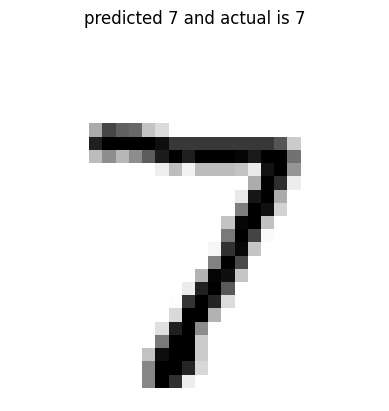

##########################


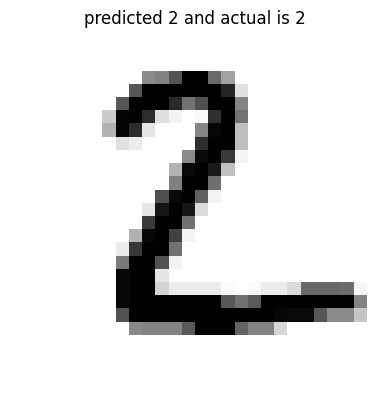

##########################


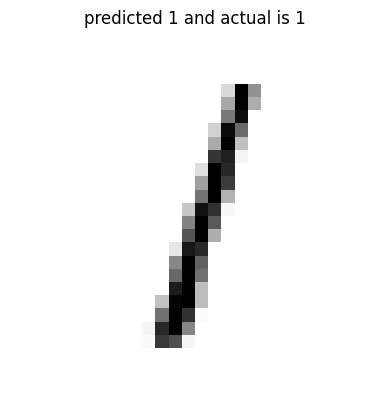

##########################


In [ ]:
for i,j,k in zip(x_new,y_pred,actual):
  plt.imshow(i,cmap="binary")
  plt.title(f"predicted {j} and actual is {k}")
  plt.axis("off")
  plt.show()
  print('##########################')